# 🌱 Theme: Sustainable Energy & Efficiency


## 📌 Project: Energy Consumption Efficiency
**Education:** Syed Shakeer Ali, B.Tech CSE (AI & ML) – Mohan Babu University.
  

---

### 🎯 Project Goal
This project focuses on analyzing and forecasting **household and industrial energy consumption**.  
The objectives are to:  
- Identify patterns in energy usage  
- Predict future energy needs  
- Suggest practical strategies for **cost savings and improved efficiency**  

---

### 🌍 What is Sustainable Energy?
Sustainable energy comes from **renewable sources** such as solar, wind, water, and bioenergy.  
The aim is to meet current energy needs **without compromising resources for future generations**.  

---

### ⚡ What is Energy Efficiency?
Energy efficiency means **using less energy to perform the same task**.  
It helps to **reduce waste, lower costs, and minimize environmental impact**.


Firstly,We will Import required Libraries:-

In [ ]:
from google.colab import files

uploaded = files.upload()
list(uploaded.keys())

Saving Energy_consumption.csv to Energy_consumption (1).csv


['Energy_consumption (1).csv']

Load & Preview Dataset

In [ ]:
import pandas as pd


data = pd.read_csv("Energy_consumption.csv")

data.head()


,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


Data Preprocessing

In [ ]:
from sklearn.preprocessing import OneHotEncoder


df = data.copy()


df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Date'] = df['Timestamp'].dt.date
df['Hour'] = df['Timestamp'].dt.hour

df['HVACUsage'] = df['HVACUsage'].map({'On': 1, 'Off': 0})
df['LightingUsage'] = df['LightingUsage'].map({'On': 1, 'Off': 0})
df['Holiday'] = df['Holiday'].map({'Yes': 1, 'No': 0})

df = pd.get_dummies(df, columns=['DayOfWeek'], drop_first=True)


df = df.drop(columns=['Timestamp', 'Date'])

df.head()


,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,Holiday,EnergyConsumption,Hour,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,25.139433,43.431581,1565.693999,5,1,0,2.774699,0,75.364373,0,True,False,False,False,False,False
1,27.731651,54.225919,1411.064918,1,1,1,21.831384,0,83.401855,1,False,True,False,False,False,False
2,28.704277,58.907658,1755.715009,2,0,0,6.764672,0,78.270888,2,False,False,True,False,False,False
3,20.080469,50.371637,1452.316318,1,0,1,8.623447,0,56.519850,3,False,False,False,False,False,True
4,23.097359,51.401421,1094.130359,9,1,0,3.071969,0,70.811732,4,False,False,False,False,False,False


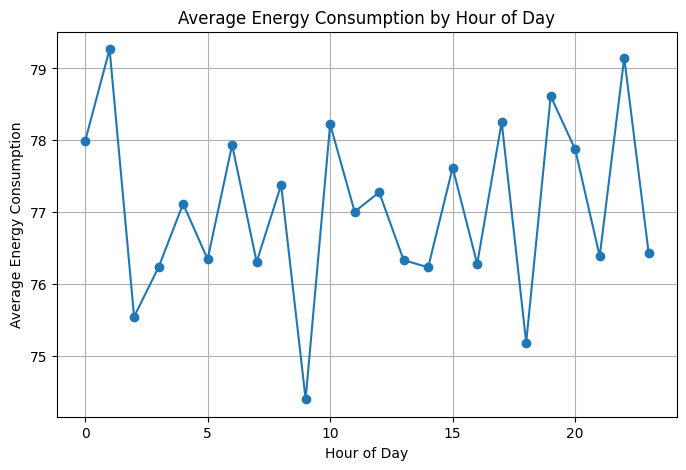

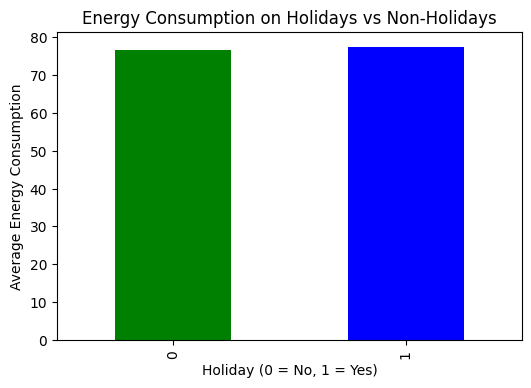

In [ ]:
import matplotlib.pyplot as plt

# 1. Energy consumption by hour
plt.figure(figsize=(8,5))
df.groupby("Hour")["EnergyConsumption"].mean().plot(kind="line", marker="o")
plt.title("Average Energy Consumption by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Energy Consumption")
plt.grid(True)
plt.show()
print("\n" * 2)
# 2. Energy consumption: Holiday vs Non-Holiday
plt.figure(figsize=(6,4))
df.groupby("Holiday")["EnergyConsumption"].mean().plot(kind="bar", color=["green", "blue"])
plt.title("Energy Consumption on Holidays vs Non-Holidays")
plt.xlabel("Holiday (0 = No, 1 = Yes)")
plt.ylabel("Average Energy Consumption")
plt.show()



## ✂️ Train-Test Split  

We separate the data into:  
- **X (features):** all input columns except `EnergyConsumption`  
- **y (target):** `EnergyConsumption`  
- Split ratio → 80% train, 20% test  


In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['EnergyConsumption'])
y = df['EnergyConsumption']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (800, 15)
Testing set: (200, 15)
